___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***. 

Before diving into the project, please take a look at the determines and tasks.

- **NOTE:** This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind regression algorithms and scikit-learn module as well as Machine Learning before you begin.


# #Determines

**Auto Scout** data which using for this project, scraped from the on-line car trading company(https://www.autoscout24.com), contains many features of different car models. In this project, you will use the data set which is already preprocessed and prepared for algorithms .

The aim of this project to understand of machine learning algorithms. Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this Senario, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression,and Elastic-Net algorithms respectively*** (After completion of Unsupervised Learning section, you can also add bagging and boosting algorithms such as ***Random Forest and XG Boost*** this notebook to develop the project. You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method. 

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






# #Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression 
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression 
#### 6. Implement Elastic-Net
#### 7. Visually Compare Models Performance In a Graph

## 1. Import Modules, Load Data and Data Review

In [3]:
# Importing required modules
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Ready_to_ML.csv')

# Display the first 5 rows of the dataset
df.head()

,make_model,make,location,price,body_type,type,warranty,mileage,gearbox,fuel_type,...,full_service_history,upholstery,previous_owner,energy_efficiency_class,age,power_kW,cons_avg,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
0,Mercedes-Benz A 160,Mercedes-Benz,"P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...",16950.0,Compact,Used,Yes,120200.0,Manual,Diesel,...,No,Cloth,2.0,efficient,6.0,75.0,3.800,Standard,Standard,Safety Premium Package
1,Mercedes-Benz EQE 350,Mercedes-Benz,"APARTADO DE CORREOS 1032, 26140 LOGROÑO, ES",80900.0,Compact,Pre-registered,Yes,5000.0,Automatic,Electric,...,No,Part/Full Leather,1.0,efficient,0.0,215.0,2.359,Premium,Plus,Safety Premium Package
2,Mercedes-Benz A 45 AMG,Mercedes-Benz,"PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8...",69900.0,Compact,Used,Yes,18900.0,Automatic,Benzine,...,No,Part/Full Leather,2.0,unefficient,2.0,310.0,8.400,Standard,Standard,Safety Premium Plus Package
3,Mercedes-Benz A 35 AMG,Mercedes-Benz,"Carrer de Provença, 31 Local, 8029 BARCELONA, ES",46990.0,Compact,Used,Yes,18995.0,Automatic,Benzine,...,No,Part/Full Leather,2.0,unefficient,2.0,225.0,7.300,Standard,Standard,Safety Premium Package
4,Mercedes-Benz A 45 AMG,Mercedes-Benz,"CARRIL ARAGONES 4, 30007 CASILLAS, ES",16800.0,Compact,Used,Yes,197000.0,Automatic,Diesel,...,No,Part/Full Leather,2.0,unefficient,7.0,100.0,4.900,Standard,Standard,Safety Premium Plus Package


In [13]:
df.head().T

,0,1,2,3,4
make_model,Mercedes-Benz A 160,Mercedes-Benz EQE 350,Mercedes-Benz A 45 AMG,Mercedes-Benz A 35 AMG,Mercedes-Benz A 45 AMG
make,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz
location,"P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...","APARTADO DE CORREOS 1032, 26140 LOGROÑO, ES","PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8...","Carrer de Provença, 31 Local, 8029 BARCELONA, ES","CARRIL ARAGONES 4, 30007 CASILLAS, ES"
price,16950.0,80900.0,69900.0,46990.0,16800.0
body_type,Compact,Compact,Compact,Compact,Compact
type,Used,Pre-registered,Used,Used,Used
warranty,Yes,Yes,Yes,Yes,Yes
mileage,120200.0,5000.0,18900.0,18995.0,197000.0
gearbox,Manual,Automatic,Automatic,Automatic,Automatic
fuel_type,Diesel,Electric,Benzine,Benzine,Diesel


In [14]:
df.make_model.value_counts()

Renault Megane            832
SEAT Leon                 784
Volvo V40                 740
Dacia Sandero             730
Hyundai i30               706
                         ... 
Opel Zafira Tourer          1
Mercedes-Benz Viano         1
Mercedes-Benz G 55 AMG      1
Mercedes-Benz R 300         1
Hyundai Atos                1
Name: make_model, Length: 490, dtype: int64

## Feature Engineering

- Focus on the "Extras" column
- Think how a categorical feature can be converted into ordinal. 

In [23]:
# Splitting the 'extras' entries into separate extras and count their occurrence
extras_count = df['extras'].str.split(', ').explode().value_counts()

AttributeError: Can only use .str accessor with string values!

In [24]:
# Show the number of unique extras 
extras_count.shape[0]

47

In [22]:
#and the 20 most common ones
extras_count.head(20)

Alloy wheels                             16755
Touch screen                              9874
Voice Control                             8513
Automatically dimming interior mirror     8011
Sport seats                               6691
Roof rack                                 6440
Summer tyres                              5109
Emergency tyre repair kit                 4784
Ambient lighting                          3818
Sport package                             3688
Sport suspension                          3621
Shift paddles                             3603
Winter package                            3452
Catalytic Converter                       3372
E10-enabled                               3269
Cargo barrier                             2843
Electronic parking brake                  2793
Trailer hitch                             2706
Headlight washer system                   2601
Spoiler                                   2213
Name: extras, dtype: int64

### Converting the Extras feature from object to numeric

In [11]:
# Convert 'extras' into an ordinal feature by counting the number of 'extras'
df['extras'] = df['extras'].str.split(', ').apply(lambda x: len(x) if isinstance(x, list) else 0)


In [12]:
df.head().T

,0,1,2,3,4
make_model,Mercedes-Benz A 160,Mercedes-Benz EQE 350,Mercedes-Benz A 45 AMG,Mercedes-Benz A 35 AMG,Mercedes-Benz A 45 AMG
make,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz,Mercedes-Benz
location,"P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...","APARTADO DE CORREOS 1032, 26140 LOGROÑO, ES","PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8...","Carrer de Provença, 31 Local, 8029 BARCELONA, ES","CARRIL ARAGONES 4, 30007 CASILLAS, ES"
price,16950.0,80900.0,69900.0,46990.0,16800.0
body_type,Compact,Compact,Compact,Compact,Compact
type,Used,Pre-registered,Used,Used,Used
warranty,Yes,Yes,Yes,Yes,Yes
mileage,120200.0,5000.0,18900.0,18995.0,197000.0
gearbox,Manual,Automatic,Automatic,Automatic,Automatic
fuel_type,Diesel,Electric,Benzine,Benzine,Diesel


## multicollinearity control

In [13]:
# Identify numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Display numerical columns
numerical_cols

['price',
 'mileage',
 'engine_size',
 'gears',
 'co_emissions',
 'extras',
 'empty_weight',
 'previous_owner',
 'age',
 'power_kW',
 'cons_avg']

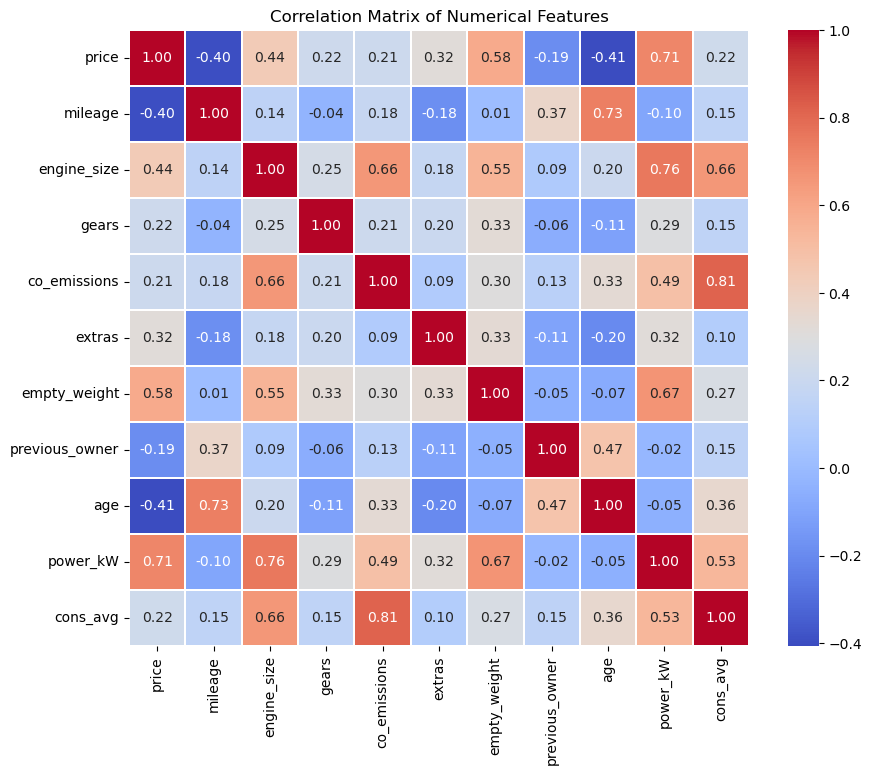

In [14]:
# Calculate the correlation matrix
corr_matrix = df[numerical_cols].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.1)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

## 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

### Train | Test Split

In [15]:
# Define the predictor variables and the target variable
X = df.drop('price', axis=1)
y = df['price']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the sizes of the training set and test set
X_train.shape, X_test.shape

((21368, 26), (5343, 26))

## OneHotEncoder

### Example

In [1]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown="ignore", sparse=False).set_output(transform="pandas")

# OneHotEncoder converts categorical features into dummies (0 and 1). If we want our model to treat all unique values ​​under the categorical feature equally, 
# we convert our categorical data to 0 and 1 using the onehotencoder conversion algorithm.
# We could also use the get_dummies() function for this conversion, but since applying get_dummies() to all data and then separating the data into train and test sets will cause data leakege,
# categorical observations for the data we prepared for ML models must be converted into dummies features with the onehotencoder conversion algorithm.
# However, when converting to categorical data, the following should not be forgotten: if there is a hierarchical superiority or ranking (expensive, 
# normal, cheap or Large, average, small, etc.) among unique observations in a categorical feature, the ordinalencoder conversion algorithm should be used. 
# We will talk about this algorithm when it takes place. Conversion of categorical data to dummies featurs is done according to the unique categorical data in the train set where the fit process is performed.
# With the handle_unknown = "ignore" parameter, all categorical data passed in the test set and not in the train set are converted to 0. The default of this parameter is handle_unknown = "error".
# If the handle_unknown parameter remains at its default value, the onehotencoder algorithm will fail for an observation that is in the test set but not in the train set.

In [4]:
train = {"train":['good','bad','worst','good', 'good', 'bad', 'bed']}
test = {"test": ['bad','worst','good', 'good', 'bad', "bed", "resume", "car"]}
train = pd.DataFrame(train)
test = pd.DataFrame(test)
train

,train
0,good
1,bad
2,worst
3,good
4,good
5,bad
6,bed


In [5]:
test

,test
0,bad
1,worst
2,good
3,good
4,bad
5,bed
6,resume
7,car


In [6]:
train

,train
0,good
1,bad
2,worst
3,good
4,good
5,bad
6,bed


In [7]:
enc.fit_transform(train[["train"]])
# Since the fit process is done on the train set, 
# the transformation (transformation) in both the train and the test set will only be made according to the unique observations in the train set.


/Applications/anaconda3/envs/Clarusway/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,train_bad,train_bed,train_good,train_worst
0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0
5,1.0,0.0,0.0,0.0
6,0.0,1.0,0.0,0.0


In [8]:
enc.transform(test[["test"]])
# Since the transformation in the test set is made according to the unique observations in the train set, 
# the unique observations in both the train and the test set are converted to 1, while the non-observations (resume, car) are converted to 0.


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- test
Feature names seen at fit time, yet now missing:
- train


In [ ]:
enc.get_feature_names_out(["train"])

array(['train_bad', 'train_bed', 'train_good', 'train_worst'],
      dtype=object)

In [ ]:
pd.DataFrame(enc.fit_transform(train[["train"]]), columns = enc.get_feature_names_out(["train"]))

,train_bad,train_bed,train_good,train_worst
0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0
5,1.0,0.0,0.0,0.0
6,0.0,1.0,0.0,0.0


In [ ]:
pd.DataFrame(enc.transform(test[["test"]]), columns = enc.get_feature_names_out(["train"]))

# When we name the features, we better see that the value 0 is assigned to the observations that are in the test set but not in the train set.

,train_bad,train_bed,train_good,train_worst
0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0
5,0.0,1.0,0.0,0.0
6,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0


## OrdinalEncoder

### Example

In [ ]:
train2 = {"train":['good','bad','worst','good', 'good', 'bad']}
test2 = {"test": ['bad','worst','good', 'good', 'bad']}
train2 = pd.DataFrame(train2)
test2 = pd.DataFrame(test2)
train2

,train
0,good
1,bad
2,worst
3,good
4,good
5,bad


In [ ]:
test2

,test
0,bad
1,worst
2,good
3,good
4,bad


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

categories = ['worst','bad','good']

enc_2 = OrdinalEncoder(categories= [categories])

In [ ]:
enc_2.fit_transform(train2[["train"]])

array([[2.],
       [1.],
       [0.],
       [2.],
       [2.],
       [1.]])

In [ ]:
enc_2.transform(test2[["test"]])

array([[1.],
       [0.],
       [2.],
       [2.],
       [1.]])

### Converting Object Features into Numerical Features Using Make Column Transformer with OrdinalEncoder and OneHotEncoder 

In [25]:
df.make.value_counts()

Volvo            3343
Mercedes-Benz    2288
Peugeot          2255
Renault          2229
Ford             2164
Opel             2107
Fiat             2010
Nissan           1914
Hyundai          1834
Toyota           1753
SEAT             1725
Skoda            1557
Dacia            1532
Name: make, dtype: int64

In [26]:
df.make_model.value_counts()

Renault Megane            832
SEAT Leon                 784
Volvo V40                 740
Dacia Sandero             730
Hyundai i30               706
                         ... 
Opel Zafira Tourer          1
Mercedes-Benz Viano         1
Mercedes-Benz G 55 AMG      1
Mercedes-Benz R 300         1
Hyundai Atos                1
Name: make_model, Length: 490, dtype: int64

In [16]:
# Select and display all non-numerical columns
non_numerical_columns = df.select_dtypes(include=['object']).columns
non_numerical_columns

Index(['make_model', 'make', 'location', 'body_type', 'type', 'warranty',
       'gearbox', 'fuel_type', 'seller', 'drivetrain', 'full_service_history',
       'upholstery', 'energy_efficiency_class',
       'comfort_&_convenience_Package', 'entertainment_&_media_Package',
       'safety_&_security_Package'],
      dtype='object')

In [20]:
## Use the one-hot encoding method to convert the categorical features 'make', 'body_type', 'type', 'gearbox', 
## 'fuel_type', 'seller', 'drivetrain', and 'full_service_history' to numerical features.

# Instantiate the encoder
encoder = OneHotEncoder(drop='first', sparse=False)

# Fit and transform the columns with the encoder and convert it to a DataFrame
encoded_data = encoder.fit_transform(df[columns_to_encode])

# Get the new feature names after one-hot encoding
new_feature_names = encoder.get_feature_names_out(columns_to_encode)

# Convert the encoded data to a DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=new_feature_names)

# Show the first few rows of the encoded DataFrame
encoded_df.head()

/Applications/anaconda3/envs/Clarusway/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,make_Fiat,make_Ford,make_Hyundai,make_Mercedes-Benz,make_Nissan,make_Opel,make_Peugeot,make_Renault,make_SEAT,make_Skoda,...,type_Used,gearbox_Manual,gearbox_Semi-automatic,fuel_type_Diesel,fuel_type_Electric,fuel_type_Liquid/Natural Gas,seller_Private seller,drivetrain_Front,drivetrain_Rear,full_service_history_Yes
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
## Now we use the "OrdinalEncoder" function to transform the features where there is an ordinal relationship, 
##'energy_efficiency_class', 'comfort_&convenience_Package', 'entertainment&media_Package', 
## and 'safety&_security_Package'.

from sklearn.preprocessing import OrdinalEncoder

# Select the columns to be ordinal encoded
columns_to_encode_ordinal = ['energy_efficiency_class', 'comfort_&_convenience_Package', 
                             'entertainment_&_media_Package', 'safety_&_security_Package']

# Instantiate the encoder
ordinal_encoder = OrdinalEncoder()

# Fit and transform the columns with the encoder and convert it to a DataFrame
encoded_ordinal_df = pd.DataFrame(ordinal_encoder.fit_transform(df[columns_to_encode_ordinal]), 
                                  columns=columns_to_encode_ordinal)

# Show the first few rows of the encoded DataFrame
encoded_ordinal_df.head()


,energy_efficiency_class,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
0,0.0,2.0,1.0,0.0
1,0.0,0.0,0.0,0.0
2,1.0,2.0,1.0,1.0
3,1.0,2.0,1.0,0.0
4,1.0,2.0,1.0,1.0


In [23]:
# Drop the original columns from the DataFrame
df_dropped = df.drop(columns_to_encode + columns_to_encode_ordinal, axis=1)

# Concatenate the original DataFrame with the encoded DataFrames
df_encoded = pd.concat([df_dropped, encoded_df, encoded_ordinal_df], axis=1)

# Show the first few rows of the new DataFrame
df_encoded.head()


,make_model,location,price,warranty,mileage,engine_size,gears,co_emissions,extras,empty_weight,...,fuel_type_Electric,fuel_type_Liquid/Natural Gas,seller_Private seller,drivetrain_Front,drivetrain_Rear,full_service_history_Yes,energy_efficiency_class,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
0,Mercedes-Benz A 160,"P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...",16950.0,Yes,120200.0,1595.0,5.0,98.0,1,1270.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0
1,Mercedes-Benz EQE 350,"APARTADO DE CORREOS 1032, 26140 LOGROÑO, ES",80900.0,Yes,5000.0,1.0,1.0,0.0,6,2355.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Mercedes-Benz A 45 AMG,"PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8...",69900.0,Yes,18900.0,1991.0,8.0,162.0,1,1555.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0
3,Mercedes-Benz A 35 AMG,"Carrer de Provença, 31 Local, 8029 BARCELONA, ES",46990.0,Yes,18995.0,1991.0,7.0,169.0,1,1455.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0
4,Mercedes-Benz A 45 AMG,"CARRIL ARAGONES 4, 30007 CASILLAS, ES",16800.0,Yes,197000.0,2143.0,7.0,162.0,1,1545.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0


In [25]:
# Identify numerical columns
numerical_cols = df_encoded.select_dtypes(include=[np.number]).columns.tolist()

# Display numerical columns
numerical_cols

['price',
 'mileage',
 'engine_size',
 'gears',
 'co_emissions',
 'extras',
 'empty_weight',
 'previous_owner',
 'age',
 'power_kW',
 'cons_avg',
 'make_Fiat',
 'make_Ford',
 'make_Hyundai',
 'make_Mercedes-Benz',
 'make_Nissan',
 'make_Opel',
 'make_Peugeot',
 'make_Renault',
 'make_SEAT',
 'make_Skoda',
 'make_Toyota',
 'make_Volvo',
 'body_type_Convertible',
 'body_type_Coupe',
 'body_type_Off-Road/Pick-up',
 'body_type_Sedan',
 'body_type_Station wagon',
 "type_Employee's car",
 'type_Pre-registered',
 'type_Used',
 'gearbox_Manual',
 'gearbox_Semi-automatic',
 'fuel_type_Diesel',
 'fuel_type_Electric',
 'fuel_type_Liquid/Natural Gas',
 'seller_Private seller',
 'drivetrain_Front',
 'drivetrain_Rear',
 'full_service_history_Yes',
 'energy_efficiency_class',
 'comfort_&_convenience_Package',
 'entertainment_&_media_Package',
 'safety_&_security_Package']

In [27]:
df_encoded.head()

,make_model,location,price,warranty,mileage,engine_size,gears,co_emissions,extras,empty_weight,...,fuel_type_Electric,fuel_type_Liquid/Natural Gas,seller_Private seller,drivetrain_Front,drivetrain_Rear,full_service_history_Yes,energy_efficiency_class,comfort_&_convenience_Package,entertainment_&_media_Package,safety_&_security_Package
0,Mercedes-Benz A 160,"P.I. EL PALMAR C/FORJA 6, 11500 PUERTO DE SAN...",16950.0,Yes,120200.0,1595.0,5.0,98.0,1,1270.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0
1,Mercedes-Benz EQE 350,"APARTADO DE CORREOS 1032, 26140 LOGROÑO, ES",80900.0,Yes,5000.0,1.0,1.0,0.0,6,2355.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Mercedes-Benz A 45 AMG,"PORT. TARRACO, MOLL DE LLEVANT, Nº 5, LOC. 6-8...",69900.0,Yes,18900.0,1991.0,8.0,162.0,1,1555.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0
3,Mercedes-Benz A 35 AMG,"Carrer de Provença, 31 Local, 8029 BARCELONA, ES",46990.0,Yes,18995.0,1991.0,7.0,169.0,1,1455.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0
4,Mercedes-Benz A 45 AMG,"CARRIL ARAGONES 4, 30007 CASILLAS, ES",16800.0,Yes,197000.0,2143.0,7.0,162.0,1,1545.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,1.0,1.0


In [26]:
# Calculate the correlation matrix
corr_matrix = df[numerical_cols].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.1)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

KeyError: '[\'make_Fiat\', \'make_Ford\', \'make_Hyundai\', \'make_Mercedes-Benz\', \'make_Nissan\', \'make_Opel\', \'make_Peugeot\', \'make_Renault\', \'make_SEAT\', \'make_Skoda\', \'make_Toyota\', \'make_Volvo\', \'body_type_Convertible\', \'body_type_Coupe\', \'body_type_Off-Road/Pick-up\', \'body_type_Sedan\', \'body_type_Station wagon\', "type_Employee\'s car", \'type_Pre-registered\', \'type_Used\', \'gearbox_Manual\', \'gearbox_Semi-automatic\', \'fuel_type_Diesel\', \'fuel_type_Electric\', \'fuel_type_Liquid/Natural Gas\', \'seller_Private seller\', \'drivetrain_Front\', \'drivetrain_Rear\', \'full_service_history_Yes\'] not in index'

## Scaling

## 3. Implement Linear Regression

 - Import the modul
 - Fit the model 
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics
 
*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

In [ ]:
# Pre-defined functions

def train_val(model, X_train, y_train, X_test, y_test):
    """This function will help you get regression metrics on both train
    and test set provided. 

    Args:
        model : model that is used for prediction
        X_train : Train features
        y_train : Train target
        X_test  : Test features
        y_test  : Test target

    Returns:
        Dataframe : Returns scores dataframe
    """
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

def adj_r2(y_test, y_pred, X):
    """This function gives adjusted R^2 

    Args:
        y_test : Actual target
        y_pred : Predcition
        X : Features 

    Returns:
        adj_r2: Adjusted R^2
    """
    r2 = r2_score(y_test, y_pred)
    n = X.shape[0]   # number of observations
    p = X.shape[1]   # number of independent variables 
    adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
    return adj_r2


## Cross Validate

## Prediction Error

## Residual Plot

## Dropping outliers that worsen my predictions from the dataset

- After dropping re-fit and evaluate your model

## Pipeline
- Read the documentation and apply pipeline 
- link : https://scikit-learn.org/stable/modules/compose.html

## 4. Implement Ridge Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True  
- ***Fit the model (use pipeline)***
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hiperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value. 

## Ridge

## Cross Validation

## Finding best alpha for Ridge

## 5. Implement Lasso Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True 
- ***Fit the model (use pipeline)*** 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hiperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value. 
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

## Cross Validation

## Finding best alpha for Lasso

## 6. Implement Elastic-Net

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True 
- ***Fit the model (use pipeline)*** 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hiperparameter by using [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value. 
- Compare different evaluation metrics

## Cross Validation

## Finding best alpha and l1_ratio for ElasticNet

## Feature İmportance
- Select the first 6 important features with the use of LASSO and re-fit the model 

## Cross Validate

## 7. Visually Compare Models Performance In a Graph

## Prediction a new observation
- Create an observation and predict its price

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___